In [1]:
# Import necessary libraries for data processing, modeling, and visualization
# --- Random Forest_Throughput Regression---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
# Load dataset and remove unnecessary column
df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define features and target
# Define input features (X) and target variable (y)

X = df.drop('throughput', axis=1)
y = df['throughput']

In [3]:
# Split dataset into training and testing subsets
# Initialize Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor model
# Initialize Random Forest Classifier with 100 trees and fixed random seed
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [4]:
# Train
# Train Random Forest model on training dataset
model.fit(X_train, y_train)

# Predict target values on the testing dataset
preds = model.predict(X_test)

In [5]:
# Evaluate
# Calculate RMSE and R-squared evaluation metrics

#rmse = mean_squared_error(y_test, preds, squared=False)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) score: {r2:.4f}")

Root Mean Squared Error (RMSE): 0.0291
R-squared (R²) score: 0.9999


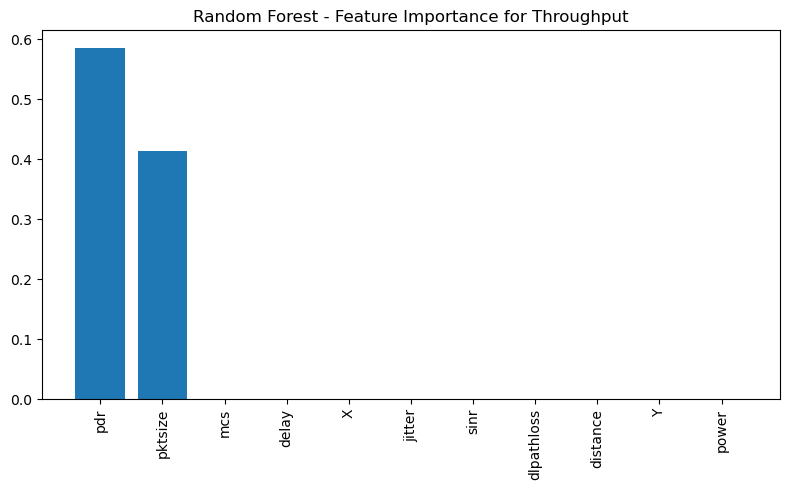

In [6]:
# Plot Feature Importance
importances = model.feature_importances_

# Sort features based on importance scores
indices = importances.argsort()[::-1]


# Plot the feature importance for better visualization
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest - Feature Importance for Throughput")
plt.tight_layout()
plt.show()